In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import lambertw

In [4]:
enz = np.array(pd.read_table("data/Enzyme only/expt 5-2/AP0pt05ugmL-1_4MUP2mM013.txt"),dtype=np.double).T

In [5]:
time=enz[0]
enz_data = enz[1:]
print(enz_data.shape)

(1240, 181)


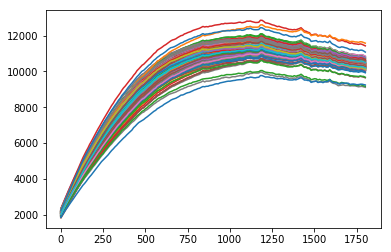

In [6]:
for data in enz_data[:181]:
    plt.plot(time,data)

In [45]:
def s(t,km,vmax,s0):
    return km*lambertw(s0/km*np.exp((-vmax*t+s0)/km))

def p(t,k1,k1m,k2,e0,s0):
    km = (k1m+k2)/k1
    vmax = k2*e0
    ss = s(t,km,vmax,s0)
    es = e0*ss/(km+ss)*(1-np.exp(-(km+ss)*k1*t))
    return s0-ss-es

/Users/hstrey/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


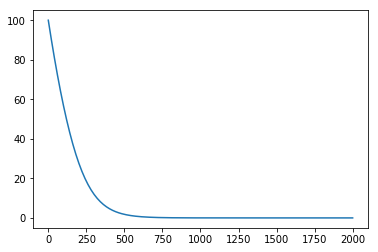

In [43]:
t = np.linspace(0,2000,200)
plt.plot(t,s(t,100,1,100))

/Users/hstrey/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


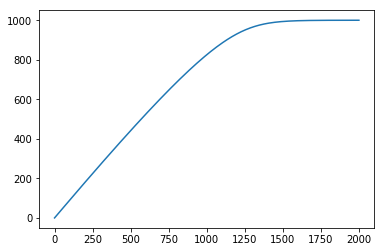

In [47]:
plt.plot(t,p(t,0.1,5,5,0.2,1000))